In [1]:
import tensorflow as tf
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import os

In [3]:
print(tf. __version__)

2.8.0


In [3]:
# Load the data
data_path = 'snapshots_20_J2'
file_names = os.listdir(data_path)
data = []
labels = []
for file_name in file_names:
    temperature = float(file_name.split('_')[1])/100  # Extract the temperature from the file name
    if temperature <= 4.53:  # Ordered phase
        label = 0
    else:  # Disordered phase
        label = 1
    file_path = os.path.join(data_path, file_name)
    with open(file_path, 'r') as f:
        file_data = np.loadtxt(f)
        file_data = np.expand_dims(file_data, axis=-1)  # Add a channel dimension
        data.append(file_data)
        labels.append(label)
data = np.array(data)
labels = np.array(labels)

In [7]:
np.shape(data)

(20000, 20, 20, 1)

In [4]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(20,20,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                36928     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(data, labels, epochs=50, validation_split=0.2)

Epoch 1/50
500/500 [==============================] - 12s 9ms/step - loss: 0.4518 - accuracy: 0.7754 - val_loss: 0.4833 - val_accuracy: 0.8415
Epoch 2/50
500/500 [==============================] - 4s 8ms/step - loss: 0.3934 - accuracy: 0.8046 - val_loss: 0.3981 - val_accuracy: 0.8615
Epoch 3/50
500/500 [==============================] - 4s 8ms/step - loss: 0.3785 - accuracy: 0.8129 - val_loss: 0.4454 - val_accuracy: 0.8370
Epoch 4/50
500/500 [==============================] - 4s 8ms/step - loss: 0.3717 - accuracy: 0.8173 - val_loss: 0.4348 - val_accuracy: 0.8522
Epoch 5/50
500/500 [==============================] - 4s 8ms/step - loss: 0.3567 - accuracy: 0.8273 - val_loss: 0.4149 - val_accuracy: 0.8580
Epoch 6/50
500/500 [==============================] - 4s 8ms/step - loss: 0.3506 - accuracy: 0.8311 - val_loss: 0.4253 - val_accuracy: 0.8540
Epoch 7/50
500/500 [==============================] - 4s 9ms/step - loss: 0.3391 - accuracy: 0.8372 - val_loss: 0.3695 - val_accuracy: 0.8652
Epoch

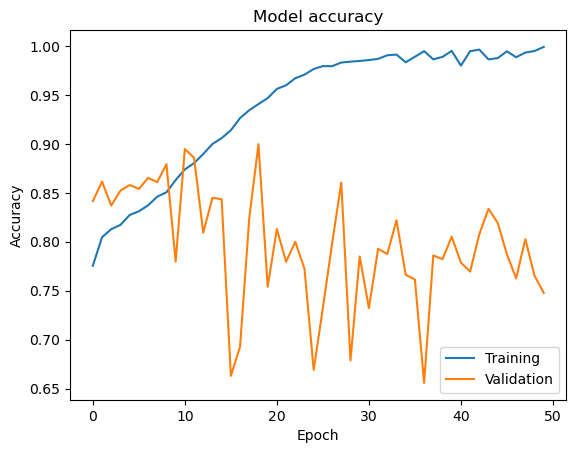

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

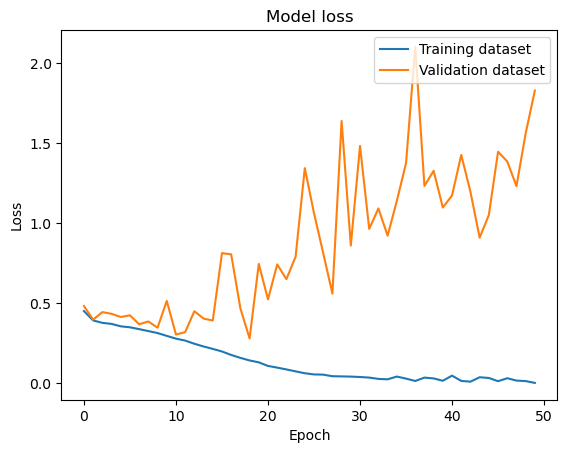

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training dataset', 'Validation dataset'], loc='upper right')
plt.show()

In [15]:
# Load the test data
data_path = 'test_20_J2_misclassificiation'
file_names = os.listdir(data_path)
test_data = []
test_labels = []
for file_name in file_names:
    temperature = float(file_name.split('_')[1])/100  # Extract the temperature from the file name
    if temperature <= 4.53:  # Ordered phase
        label = 0
    else:  # Disordered phase
        label = 1
    file_path = os.path.join(data_path, file_name)
    with open(file_path, 'r') as f:
        file_data = np.loadtxt(f)
        file_data = np.expand_dims(file_data, axis=-1)  # Add a channel dimension
        test_data.append(file_data)
        test_labels.append(label)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [16]:
test_loss, test_acc = model.evaluate(test_data, test_labels, batch_size=10)

500/500 [==============================] - 3s 5ms/step - loss: 4.9210 - accuracy: 0.5216


In [17]:
for i in range(50):
    test_loss, test_acc = model.evaluate(test_data[i*100:(i+1)*100], test_labels[i*100:(i+1)*100], batch_size=5)

20/20 [==============================] - 0s 6ms/step - loss: 6.7292 - accuracy: 0.4500


In [18]:
len(test_data)

5000

In [19]:
test_loss, test_acc = model.evaluate(test_data, test_labels, batch_size=10)

500/500 [==============================] - 3s 6ms/step - loss: 4.9210 - accuracy: 0.5216


In [20]:
for i in range(50):
    test_loss, test_acc = model.evaluate(test_data[i*100:(i+1)*100], test_labels[i*100:(i+1)*100], batch_size=5)

20/20 [==============================] - 0s 6ms/step - loss: 6.7292 - accuracy: 0.4500


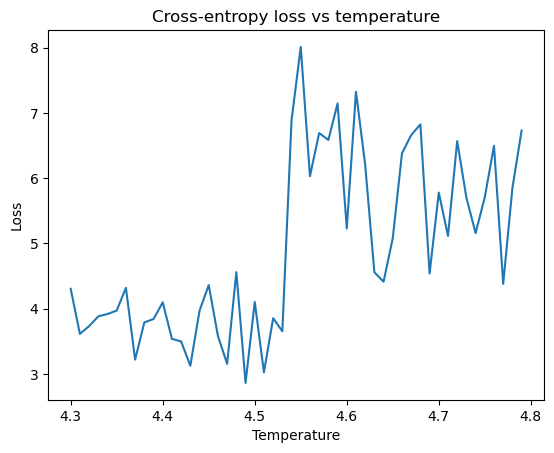

In [21]:
loss_list = [4.3046,
3.6152,
3.7336,
3.884,
3.9194,
3.9719,
4.3203,
3.2204,
3.7906,
3.8419,
4.0979,
3.539,
3.4994,
3.1265,
3.97,
4.3624,
3.5824,
3.1565,
4.5606,
2.864,
4.1039,
3.026,
3.8547,
3.6548,
6.8889,
8.0097,
6.0309,
6.6903,
6.5847,
7.1436,
5.2306,
7.324,
6.2073,
4.5585,
4.4138,
5.0816,
6.3792,
6.6595,
6.8232,
4.5396,
5.7784,
5.1153,
6.568,
5.7009,
5.1588,
5.709,
6.4958,
4.3807,
5.8485,
6.7292
]
bins = [4.3+0.01*i for i in range(50)]
plt.plot(bins, loss_list)
plt.title('Cross-entropy loss vs temperature')
plt.ylabel('Loss')
plt.xlabel('Temperature')
#plt.legend(['Training dataset', 'Validation dataset'], loc='upper right')
plt.show()

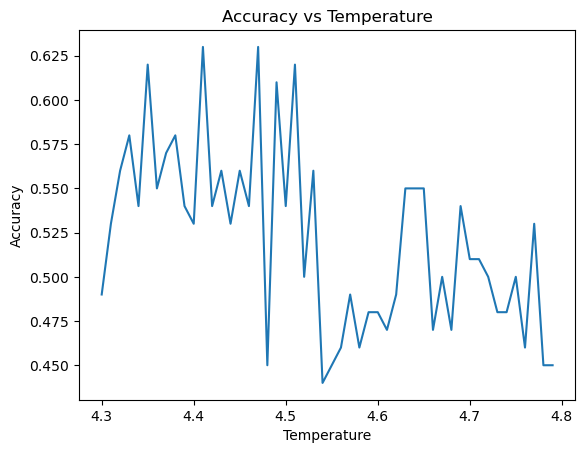

In [22]:
acc_list = [0.49,
0.53,
0.56,
0.58,
0.54,
0.62,
0.55,
0.57,
0.58,
0.54,
0.53,
0.63,
0.54,
0.56,
0.53,
0.56,
0.54,
0.63,
0.45,
0.61,
0.54,
0.62,
0.5,
0.56,
0.44,
0.45,
0.46,
0.49,
0.46,
0.48,
0.48,
0.47,
0.49,
0.55,
0.55,
0.55,
0.47,
0.5,
0.47,
0.54,
0.51,
0.51,
0.5,
0.48,
0.48,
0.5,
0.46,
0.53,
0.45,
0.45
]
plt.plot(bins, acc_list)
plt.title('Accuracy vs Temperature')
plt.ylabel('Accuracy')
plt.xlabel('Temperature')
#plt.legend(['Training dataset', 'Validation dataset'], loc='upper right')
plt.show()